# Before your start:

    Read the README.md file
    Comment as much as you can and use the resources (README.md file)
    Happy learning!

*Notes:* 

- Solve the questions with python.

- Round the final answer to three decimal places.

In [1]:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import math

## Bernoulli's Distribution

In a basket containing 100 fruits, there are 60 apples and 40 oranges. 

A fruit is picked randomly from the basket. 

1. **What is the probability that the fruit is apple?**
1. **What is the probability that it is an orange?**

Probability of picking an apple: 0.60
Probability of picking an orange: 0.40


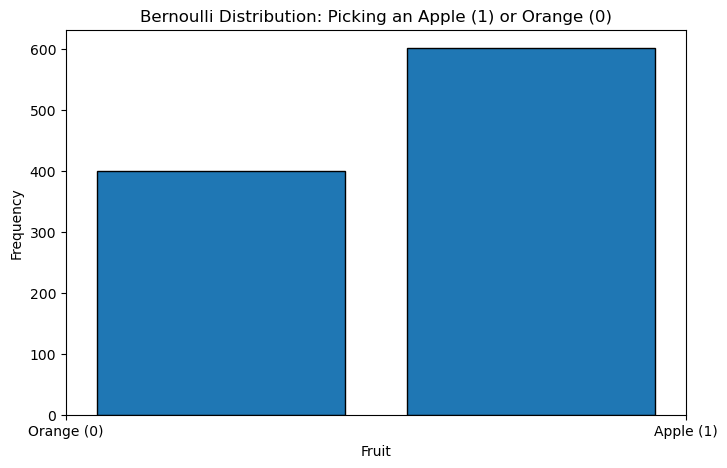

In [49]:
"""
Calculate:
p = probability that the fruit is an apple 
q = probability that the fruit is an orange
"""
from scipy.stats import bernoulli

# Total fruits in the basket
total_fruits = 100

# Probabilities
p_apple = 60 / total_fruits  # Probability of picking an apple
p_orange = 40 / total_fruits  # Probability of picking an orange

# Print the probabilities
print(f"Probability of picking an apple: {p_apple:.2f}")
print(f"Probability of picking an orange: {p_orange:.2f}")

# Simulate Bernoulli's Distribution for picking a fruit
# Let "1" represent picking an apple and "0" represent picking an orange
bernoulli_data = bernoulli.rvs(p_apple, size=1000)  # Simulate 1000 trials

# Visualize the results
plt.figure(figsize=(8, 5))
plt.hist(bernoulli_data, bins=2, rwidth=0.8, align='mid', edgecolor='black',)
plt.title('Bernoulli Distribution: Picking an Apple (1) or Orange (0)')
plt.xticks([0, 1], ['Orange (0)', 'Apple (1)'])
plt.xlabel('Fruit')
plt.ylabel('Frequency')
plt.show()


Now we take a random sample of 20 fruits from the basket. After each fruit is taken, a new fruit of the same type is replaced in the basket. Therefore, every time we are taking 1 fruit from 100 fruits. 

1. **What is the probability that the first 5 fruits are all apples?**

1. **What is the probability that the first 5 fruits are all apples and the next 15 fruits are all oranges?**

You can include the `p` and `q` probabilities you previous calculated in your solution.

In [39]:
# Probabilities
p_apple = 0.6  # Probability of picking an apple
p_orange = 0.4  # Probability of picking an orange

# 1. Probability of the first 5 fruits being all apples
p_all_apples = p_apple**5
print(f"Probability that the first 5 fruits are all apples: {p_all_apples:.5f}")

# 2. Probability of the first 5 being apples and the next 15 being oranges
p_apples_and_oranges = (p_apple**5) * (p_orange**15)
print(f"Probability that the first 5 fruits are all apples and the next 15 are all oranges: {p_apples_and_oranges:.10f}")

Probability that the first 5 fruits are all apples: 0.07776
Probability that the first 5 fruits are all apples and the next 15 are all oranges: 0.0000000835


## Binomial Distribution

Similar to the above problem, this time again we randomly sample 20 fruits.

**What is the probability that this time the sample contains 5 apples and 15 oranges?**

Please note that this time the order of the fruits being picked does not matter.

In [41]:
from scipy.stats import binom

# Parameters
n = 20  # Total trials (fruits)
k = 5   # Number of apples
p = 0.6  # Probability of picking an apple

# Binomial probability using scipy
probability = binom.pmf(k, n, p) # This function calculates the probability mass function of a binomial distribution

print(f"Probability of having exactly 5 apples and 15 oranges: {probability:.6f}")

Probability of having exactly 5 apples and 15 oranges: 0.001294


In [ ]:
# your solution here

In the lesson we also discussed CDF (cumulative distribution function). In the context of the above problem, **what is the probability that less than 5 fruits picked are apples?**

Write the formula and calculate the probability below.

In [43]:
# Parameters
n = 20  # Total trials (fruits)
p = 0.6  # Probability of picking an apple
k = 4    # Maximum number of apples for "less than 5"

# Binomial CDF: Probability of picking less than 5 apples
probability_less_than_5 = binom.cdf(k, n, p)

print(f"Probability that less than 5 fruits are apples: {probability_less_than_5:.6f}")


Probability that less than 5 fruits are apples: 0.000317


**Plot the PDF (probability distributiom function) for the above binomial distribution.**

*Hint: The range of x in a binomial distribution is from `0` to `n`.*

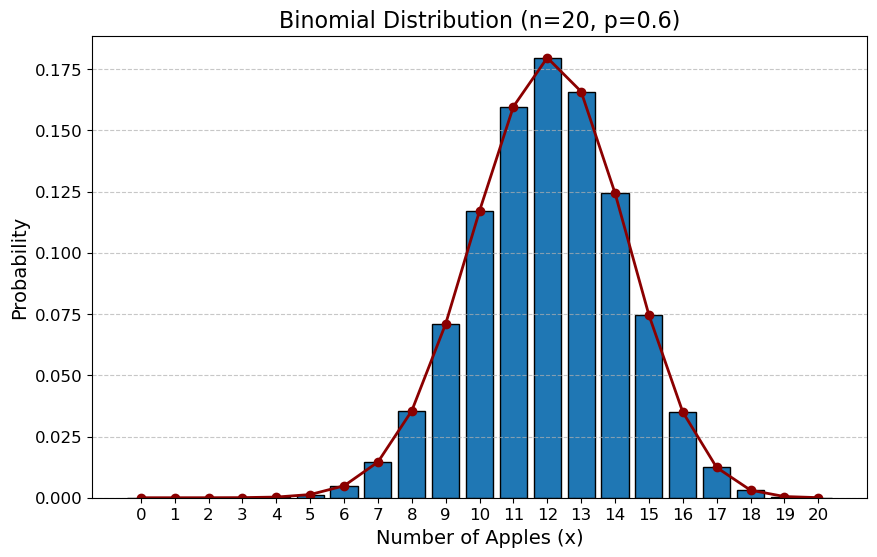

In [82]:
# Range of x values (possible outcomes: 0 to n)
x = np.arange(0, n + 1)

# Probability mass function (PMF) for each value of x
pmf_values = binom.pmf(x, n, p)

# Plotting the PMF
plt.figure(figsize=(10, 6))
plt.bar(x, pmf_values,  edgecolor='black', width=0.8)

# Line chart for the distribution
plt.plot(x, pmf_values, color='darkred', marker='o', linestyle='-', linewidth=2, label='PMF (Line)')

plt.title('Binomial Distribution (n=20, p=0.6)', fontsize=16)
plt.xlabel('Number of Apples (x)', fontsize=14)
plt.ylabel('Probability', fontsize=14)
plt.xticks(x, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## Poisson Distribution

In this challenge you are required to use the Math library in python to solve the problems.

In the UEFA champions league tournament, the average number of goals scored in a match is 2.3. 

**What is the probability that the number of goals scored in a match is 5?**

*Hint: Use the exp() in the math library*

And to calculate the factorial, you can use the following code:

```python
import math
math.factorial(n) # n is the number you want to find the factorial of
```

In [51]:
import math

# Parameters
lambda_ = 2.3  # Average number of goals
k = 5          # Number of goals we want to find the probability for

# Poisson Probability Calculation
P_k = (math.exp(-lambda_) * (lambda_**k)) / math.factorial(k)

# Output
print(f"The probability of scoring {k} goals in a match is: {P_k:.6f}")

The probability of scoring 5 goals in a match is: 0.053775


**Draw a poisson probability distribution plot for the number of goals to be between 0 to 10.**

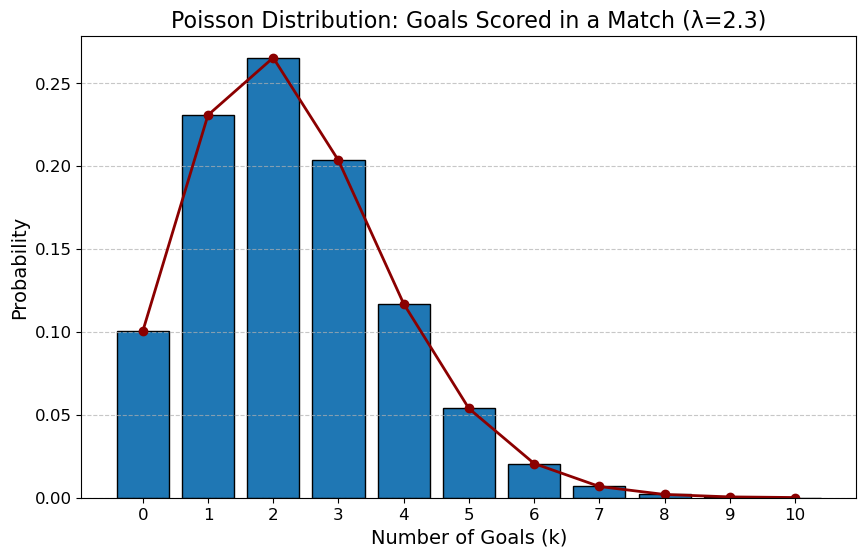

In [80]:
# Parameters
lambda_ = 2.3  # Average number of goals
k_values = range(0, 11)  # Number of goals from 0 to 10

# Calculate Poisson probabilities for each k
poisson_probabilities = [
    (math.exp(-lambda_) * (lambda_**k)) / math.factorial(k) for k in k_values
]

# Plotting the Poisson distribution
plt.figure(figsize=(10, 6))
plt.bar(k_values, poisson_probabilities,  edgecolor='black', width=0.8)

# Line chart for the distribution
plt.plot(k_values, poisson_probabilities, color='darkred', marker='o', linestyle='-', linewidth=2, label='PMF (Line)')

plt.title('Poisson Distribution: Goals Scored in a Match (λ=2.3)', fontsize=16)
plt.xlabel('Number of Goals (k)', fontsize=14)
plt.ylabel('Probability', fontsize=14)
plt.xticks(k_values, fontsize=12)
plt.yticks(fontsize=12)

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()